<a href="https://colab.research.google.com/github/Osiel1981/CursoETLdio/blob/Portif%C3%B3lio/Desafio_Dio_An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
from google.colab import files
df = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [5]:
df = pd.read_excel('AdventureWorks.xlsx')

In [6]:
df.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'],
      dtype='object')

In [7]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:
df['Valor Venda'].sum()

5984606.1426

In [9]:
df['Custo'] = df['Custo Unitário']*df['Quantidade']

In [10]:
df.sample(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
629,2008-02-14,2008-02-22,307,1155,19094,200802144CS549,324.69,980.0,5,980.0,3920.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1623.45
521,2008-12-25,2008-12-29,306,1226,19060,200812254CS676,330.99,999.0,10,1998.0,7992.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,3309.90
368,2009-03-30,2009-04-12,307,1203,19119,200903304CS709,324.69,980.0,10,1960.0,7840.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,3246.90


In [11]:
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [12]:
df['Custo'].sum()

2486783.05

In [13]:
round(df['Lucro'].sum(),2)

3497823.09

In [14]:
df['Tempo de Envio'] = (df['Data Envio']-df['Data Venda']).dt.days

In [15]:
df.sample(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de Envio
408,2009-06-26,2009-07-07,307,1178,19127,200906264CS717,330.66,998.0,12,1197.6,10778.4,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,3967.92,6810.48,11


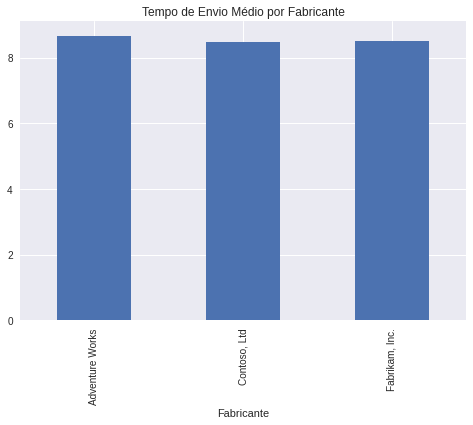

In [16]:
df.groupby('Fabricante')['Tempo de Envio'].mean().plot.bar(title='Tempo de Envio Médio por Fabricante');

In [17]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo de Envio    0
dtype: int64

In [49]:
df['Mes'] = df['Data Venda'].dt.month

In [19]:
df.groupby('Ano Venda')['Marca'].sum()

Ano Venda
2008    Adventure WorksAdventure WorksAdventure WorksA...
2009    Adventure WorksAdventure WorksAdventure WorksA...
Name: Marca, dtype: object

In [20]:
pd.options.display.float_format = '{:20,.2f}'.format

In [21]:
round(df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index() ,2) #acrescentando reset index o index deixa de ser a data.

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [89]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False);

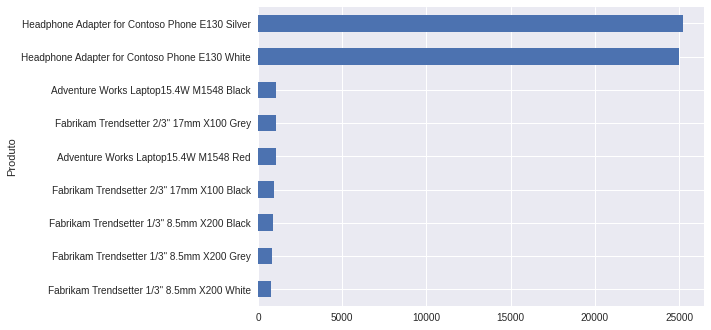

In [23]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh();

In [24]:
df.groupby(df['Data Venda'].dt.year) ['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

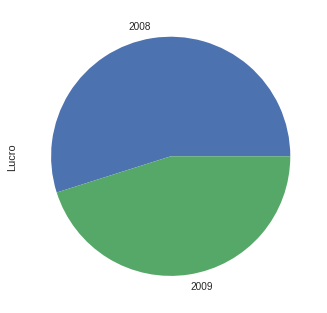

In [25]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.pie();

In [51]:
df2009 = df[df['Data Venda'].dt.year == 2009]

In [52]:
df2009.sample(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,...,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de Envio,Ano Venda,Mes
880,2009-02-13,2009-02-19,306,366,19062,200902133CS737,348.58,758.00,6,318.36,...,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,"2,091.48","2,138.16",6,2009,2


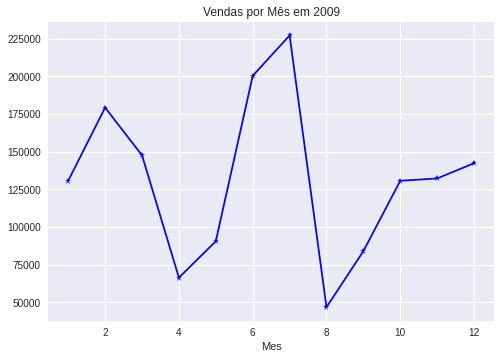

In [68]:
df2009.groupby(df2009['Mes'])['Lucro'].sum().plot(title='Vendas por Mês em 2009', color='blue', marker="*")
plt.xlabel = "Mes"
plt.ylabel ='Lucro';

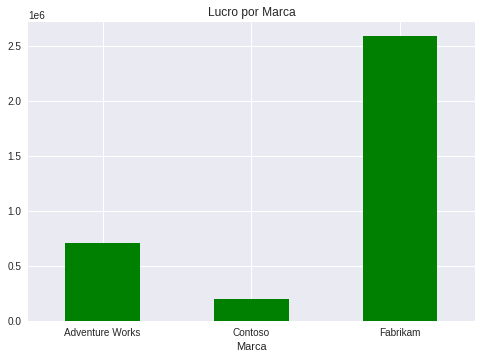

In [72]:
df.groupby(df['Marca'])['Lucro'].sum().plot.bar(title='Lucro por Marca', color='green')
plt.xticks(rotation='horizontal');

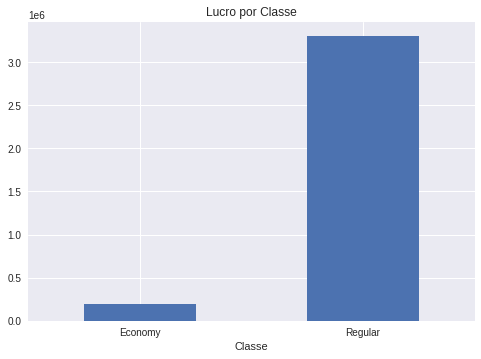

In [74]:
df.groupby(df['Classe'])['Lucro'].sum().plot.bar(title='Lucro por Classe')
plt.xticks(rotation='horizontal');

In [84]:
df['Tempo de Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo de Envio, dtype: float64

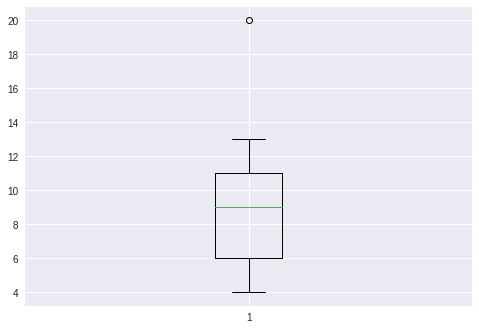

In [86]:
plt.boxplot(df['Tempo de Envio']);

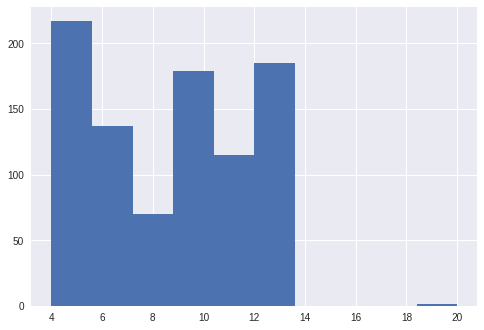

In [88]:
plt.hist(df['Tempo de Envio']);

In [103]:
outlier = df[df['Tempo de Envio'] >= 15]
outlier

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,...,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de Envio,Ano Venda,Mes
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,...,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20,2008,5
